In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

In [2]:
data_dir = "..\\data\\"

In [3]:
df = pd.read_csv(f"{data_dir}20241031agg_smart_chr.csv")
print(df.shape)
df.head(3)

(1605, 38)


,year,cbsacode,Sample_Size,Data_value,Data_value_unit,Data_value_type,population,total_adult_obesity,total_adult_smoking,total_children_in_poverty,total_children_in_single-parent_households,total_excessive_drinking,total_homicides,total_mental_health_providers,total_motor_vehicle_crash_deaths,total_not_proficient_in_english,total_physical_inactivity,total_poor_or_fair_health,total_premature_death,total_primary_care_physicians,total_rural,total_sexually_transmitted_infections,total_uninsured_adults,total_violent_crime,total_poor_physical_health_days,total_poor_mental_health_days,depression_twitter19,depression_twitter10,CENSUS2019POP,CENSUS2010POP,Park_Area_Acres,Weighted_RESP,noise4050n,noise5060n,noise6070n,noise7080n,noise8090n,noise90n
0,2011,10100,88,16.75,%,Crude Prevalence,39139,8924.320295,5720.877944,1145.953026,2023.366088,6192.435272,0.70408,0.000080,5.107186,580.270000,8501.832617,3780.488759,2055.415364,0.000342,14460.99600,87.945333,3323.081065,0.000000,1943.833333,1513.093333,NaN,NaN,NaN,NaN,550.773301,0.169974,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,10100,105,19.36,%,Crude Prevalence,41357,10033.372000,5432.763000,1193.423000,2255.656177,6567.681000,0.00000,0.000000,4.618516,236.587419,8718.757000,3503.131000,2269.765419,0.000359,14811.12425,133.732192,3382.513897,68.681027,1923.283333,1629.268333,NaN,NaN,NaN,NaN,550.773301,0.169974,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,10100,84,14.29,%,Crude Prevalence,41948,9547.014000,5485.478000,1239.094000,2401.510485,6630.726000,0.00000,0.001228,4.457074,360.664074,8141.064000,3537.146000,2239.679700,0.000355,14992.53371,116.714265,3319.492686,76.653985,1950.838333,1653.543333,NaN,NaN,NaN,NaN,550.773301,0.169974,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for i in ['Park_Area_Acres', 'Weighted_RESP', 'noise4050n', 'noise5060n', 'noise6070n', 'noise7080n', 'noise8090n', 'noise90n']:
    print(df[i].isna().sum())

0
0
718
718
718
718
718
718


In [5]:
df = df.drop(df[(df['CENSUS2019POP'].notna()) | (df['CENSUS2010POP'].notna())].index) # filter out Twitter data
print(df.shape)
df.columns = df.columns.str.replace('-', '_').str.replace(' ', '_')

(1505, 38)


In [6]:
def calculate_weighted_depressed(row):
    return row['Data_value'] / 100 * row['population'] if not pd.isna(row['Data_value']) and not pd.isna(row['population']) else np.nan

df['weighted_depressed'] = df.apply(calculate_weighted_depressed, axis=1)
print(df.shape)

(1505, 39)


In [7]:
df.columns

Index(['year', 'cbsacode', 'Sample_Size', 'Data_value', 'Data_value_unit',
       'Data_value_type', 'population', 'total_adult_obesity',
       'total_adult_smoking', 'total_children_in_poverty',
       'total_children_in_single_parent_households',
       'total_excessive_drinking', 'total_homicides',
       'total_mental_health_providers', 'total_motor_vehicle_crash_deaths',
       'total_not_proficient_in_english', 'total_physical_inactivity',
       'total_poor_or_fair_health', 'total_premature_death',
       'total_primary_care_physicians', 'total_rural',
       'total_sexually_transmitted_infections', 'total_uninsured_adults',
       'total_violent_crime', 'total_poor_physical_health_days',
       'total_poor_mental_health_days', 'depression_twitter19',
       'depression_twitter10', 'CENSUS2019POP', 'CENSUS2010POP',
       'Park_Area_Acres', 'Weighted_RESP', 'noise4050n', 'noise5060n',
       'noise6070n', 'noise7080n', 'noise8090n', 'noise90n',
       'weighted_depressed'],
   

In [11]:
len(['total_adult_obesity',
       'total_adult_smoking', 'total_children_in_poverty',
       'total_children_in_single-parent_households',
       'total_excessive_drinking', 'total_homicides',
       'total_mental_health_providers', 'total_motor_vehicle_crash_deaths',
       'total_not_proficient_in_english', 'total_physical_inactivity',
       'total_poor_or_fair_health', 'total_premature_death',
       'total_primary_care_physicians', 'total_rural',
       'total_sexually_transmitted_infections', 'total_uninsured_adults',
       'total_violent_crime', 'total_poor_physical_health_days',
       'total_poor_mental_health_days',
       'Park_Area_Acres', 'Weighted_RESP', 'noise4050n', 'noise5060n',
       'noise6070n', 'noise7080n', 'noise8090n', 'noise90n']
)

27

In [12]:
target_cols = [
        'total_adult_obesity',
       'total_adult_smoking', 'total_children_in_poverty',
       'total_children_in_single_parent_households',
       'total_excessive_drinking', 'total_homicides',
       'total_mental_health_providers', 'total_motor_vehicle_crash_deaths',
       'total_not_proficient_in_english', 'total_physical_inactivity',
       'total_poor_or_fair_health', 'total_premature_death',
       'total_primary_care_physicians', 'total_rural',
       'total_sexually_transmitted_infections', 'total_uninsured_adults',
       'total_violent_crime', 'total_poor_physical_health_days',
       'total_poor_mental_health_days', 
       'Park_Area_Acres', 'Weighted_RESP', 'noise4050n', 'noise5060n',
       'noise6070n', 'noise7080n', 'noise8090n', 'noise90n',
       'weighted_depressed'
       ]

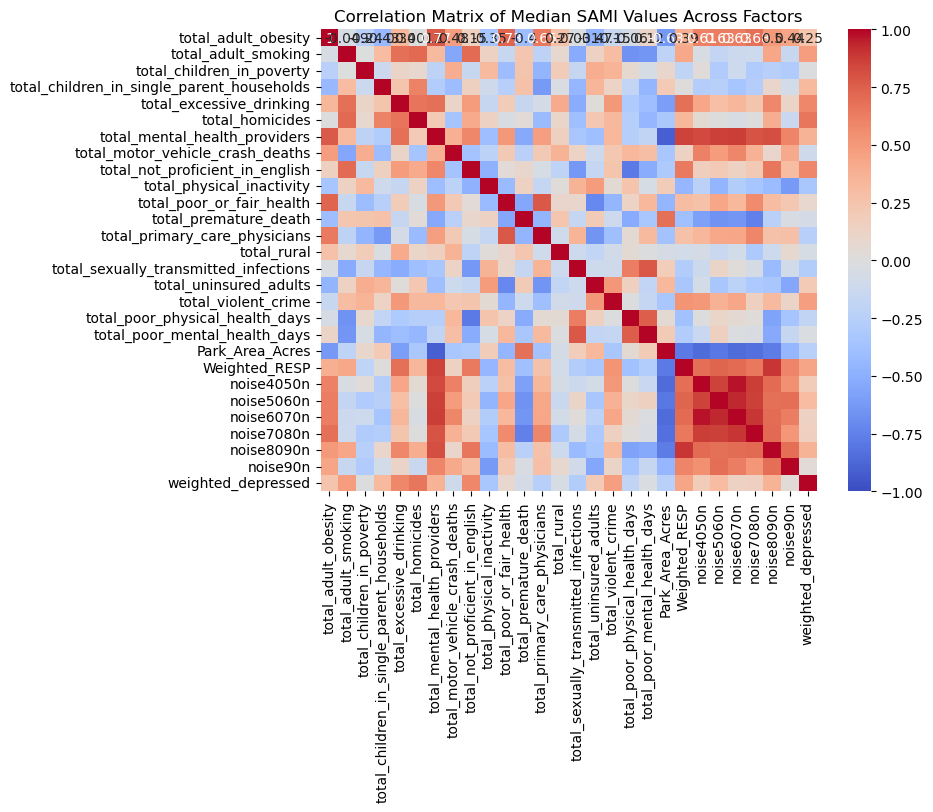

In [13]:
def calculate_sami(df, target_column, year):
    df['log_' + target_column] = np.log(df[target_column].replace(0, np.nan))
    df['logpop'] = np.log(df['population'].replace(0, np.nan))
    year_data = df[df['year'] == year].dropna(subset=['log_' + target_column, 'logpop'])
    if year_data.empty:
        return None
    lm = smf.ols(formula=f'log_{target_column} ~ logpop', data=year_data).fit()
    intercept = lm.params['Intercept']
    year_data[f'SAMI_{target_column}'] = year_data['log_' + target_column] - (lm.params['logpop'] * year_data['logpop'] + intercept)
    return year_data[f'SAMI_{target_column}'].median()

sami_dict = {}

for factor_col in target_cols:
    for year in sorted(df['year'].unique()):
        sami_val = calculate_sami(df, factor_col, year)
        if year not in sami_dict:
            sami_dict[year] = {}
        sami_dict[year][factor_col] = sami_val

sami_df = pd.DataFrame.from_dict(sami_dict, orient='index')
corr_matrix = sami_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Median SAMI Values Across Factors")
plt.show()

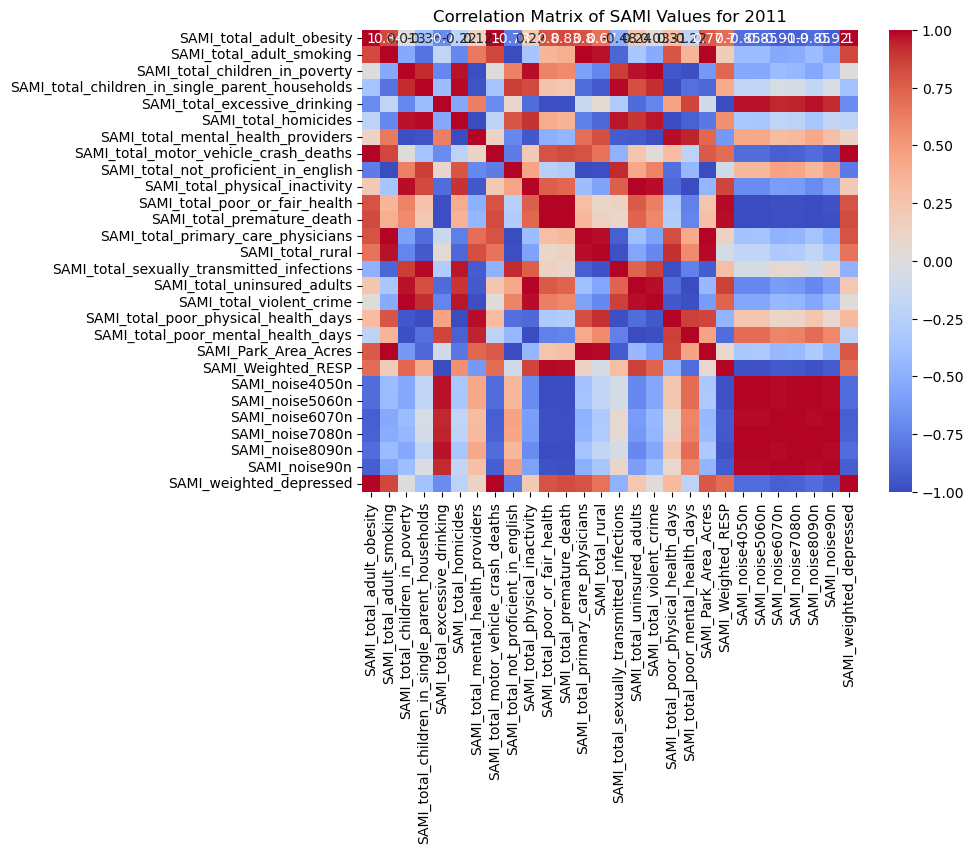

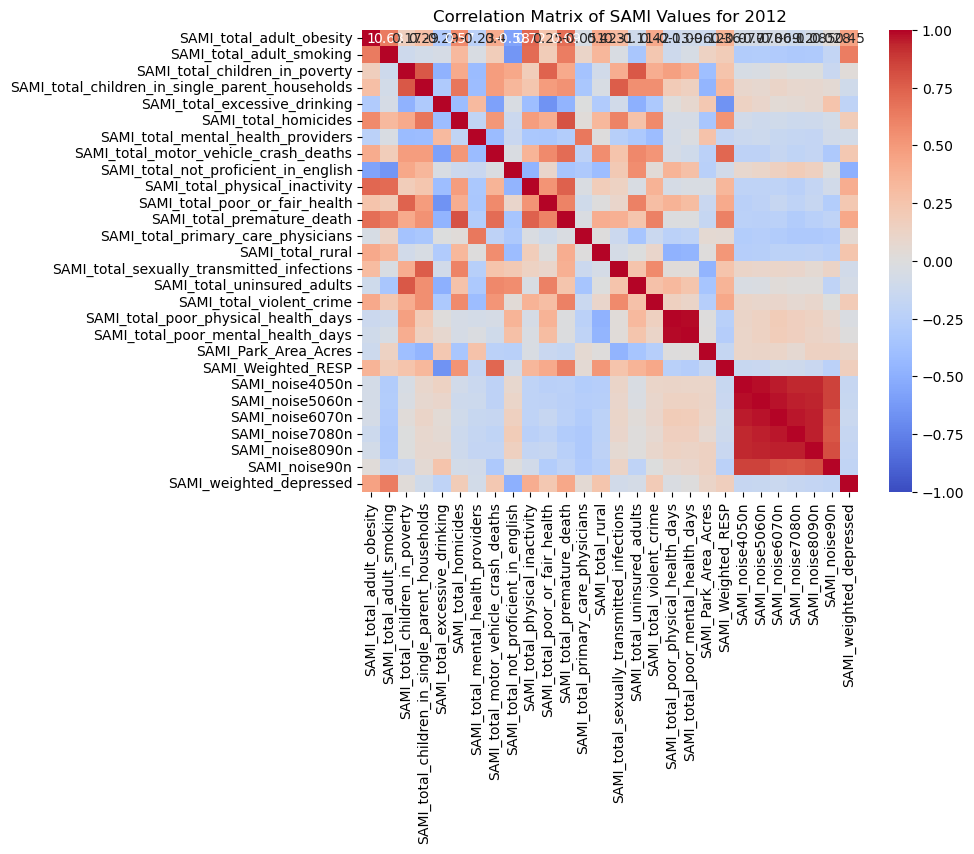

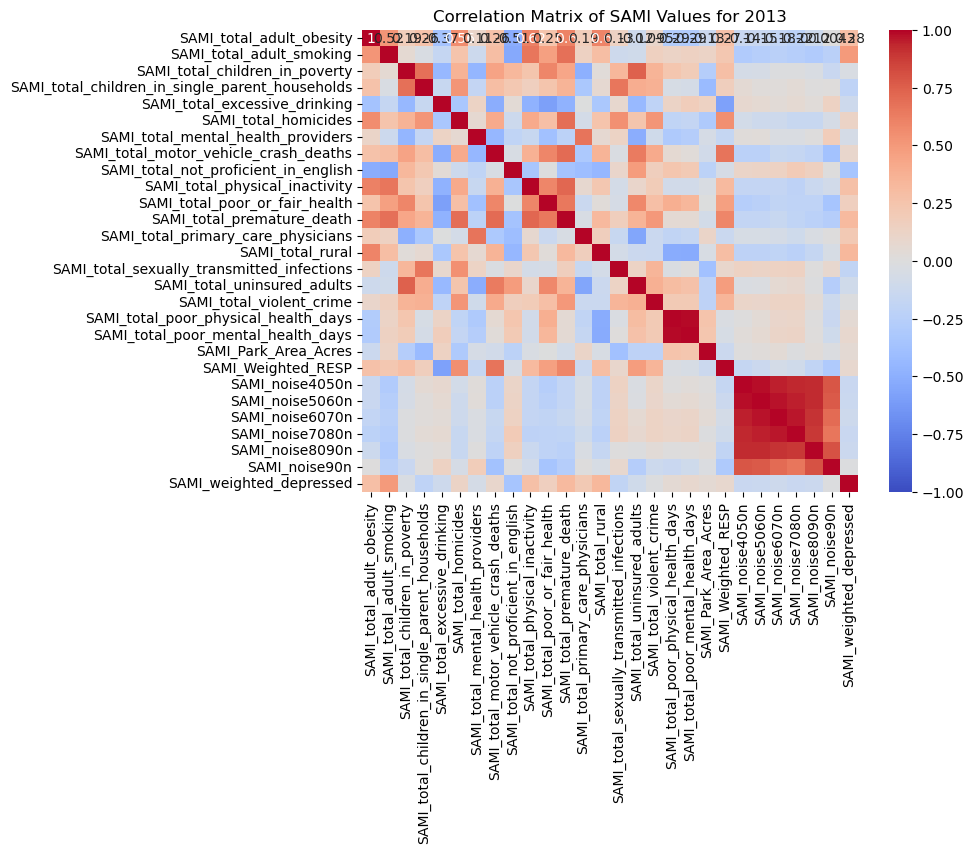

No valid SAMI data for year 2014, skipping visualization.


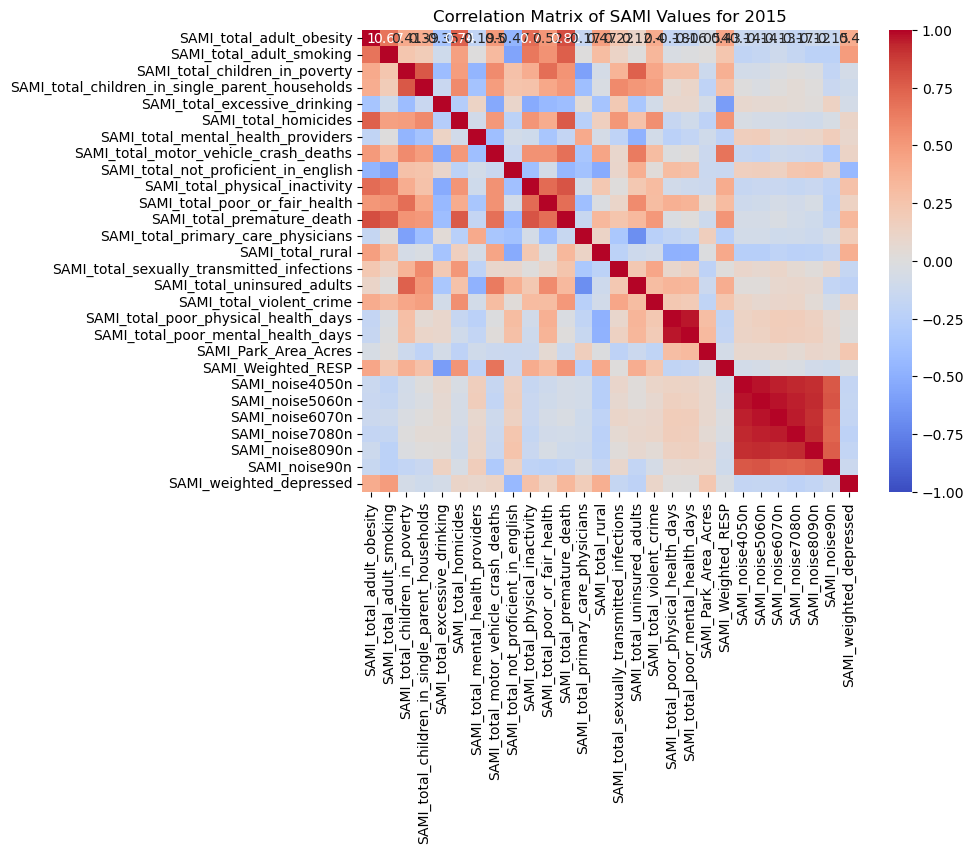

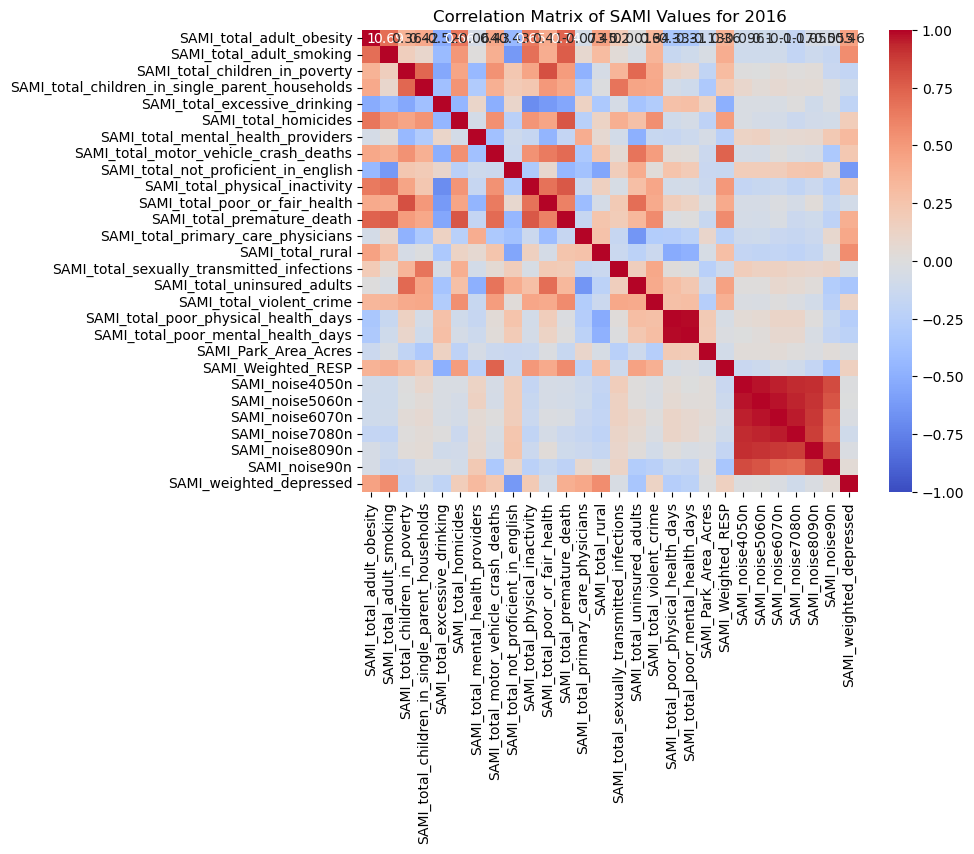

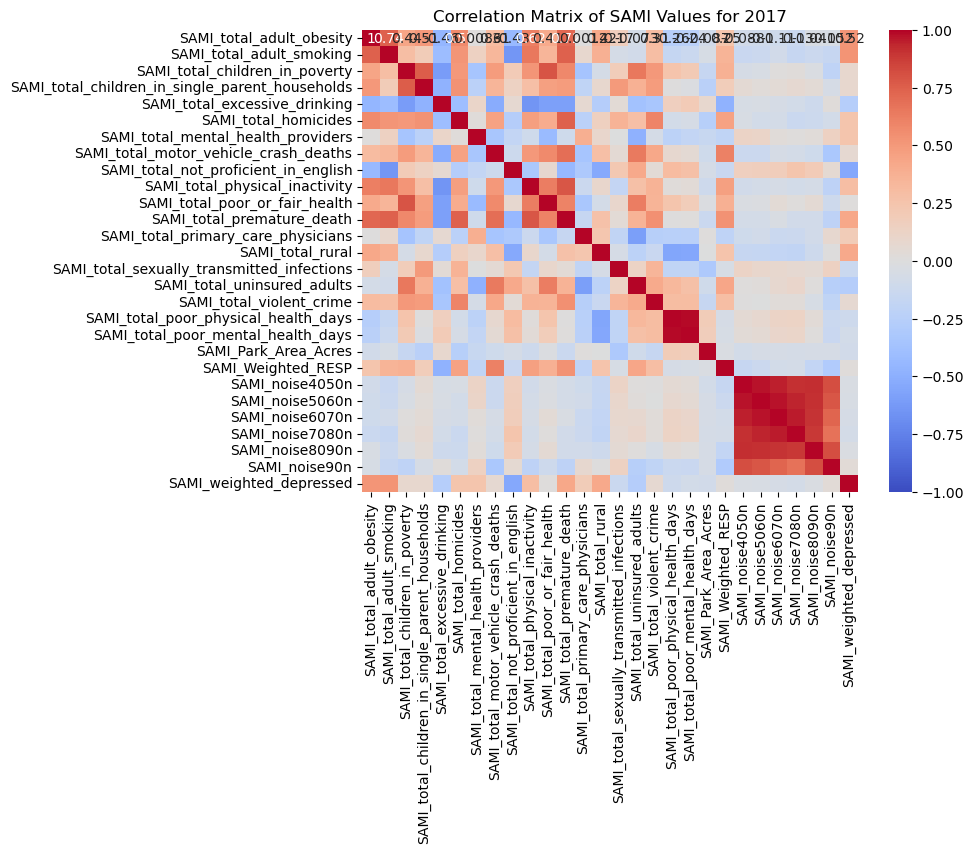

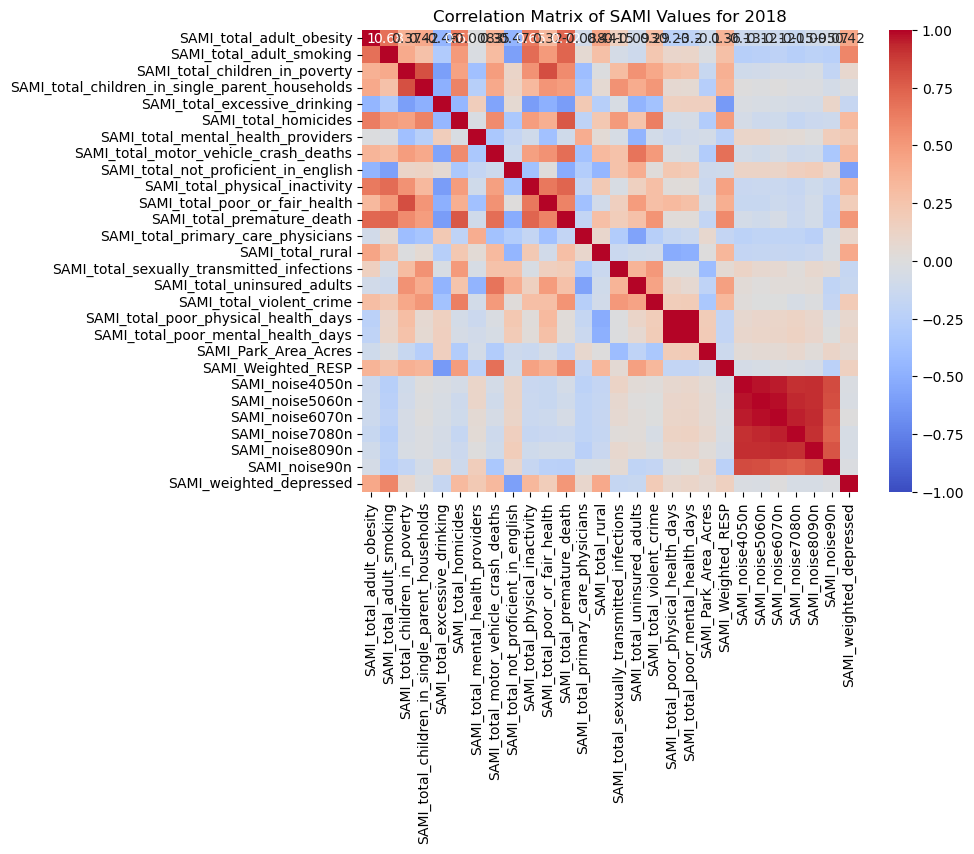

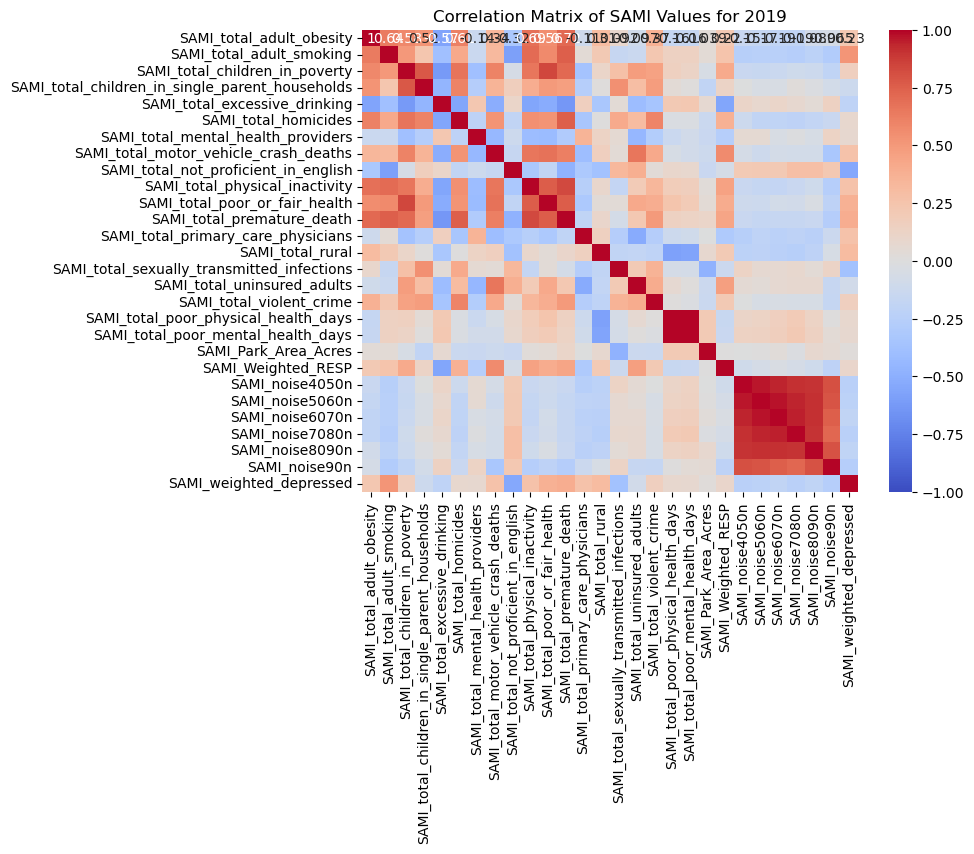

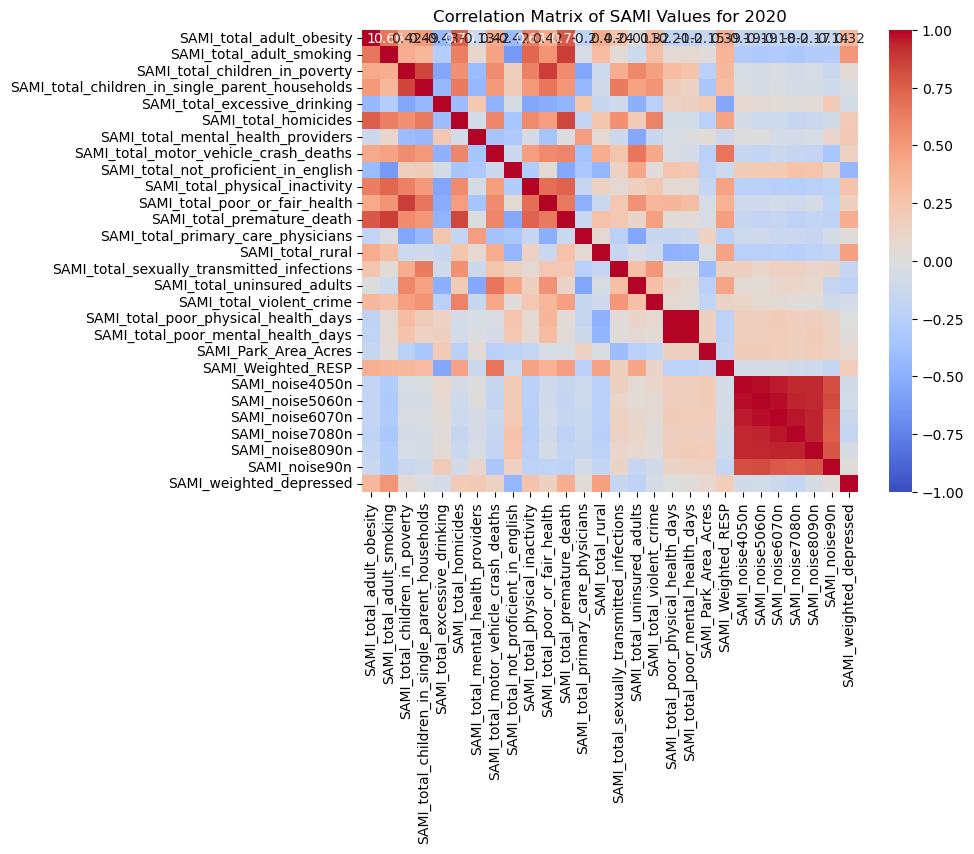

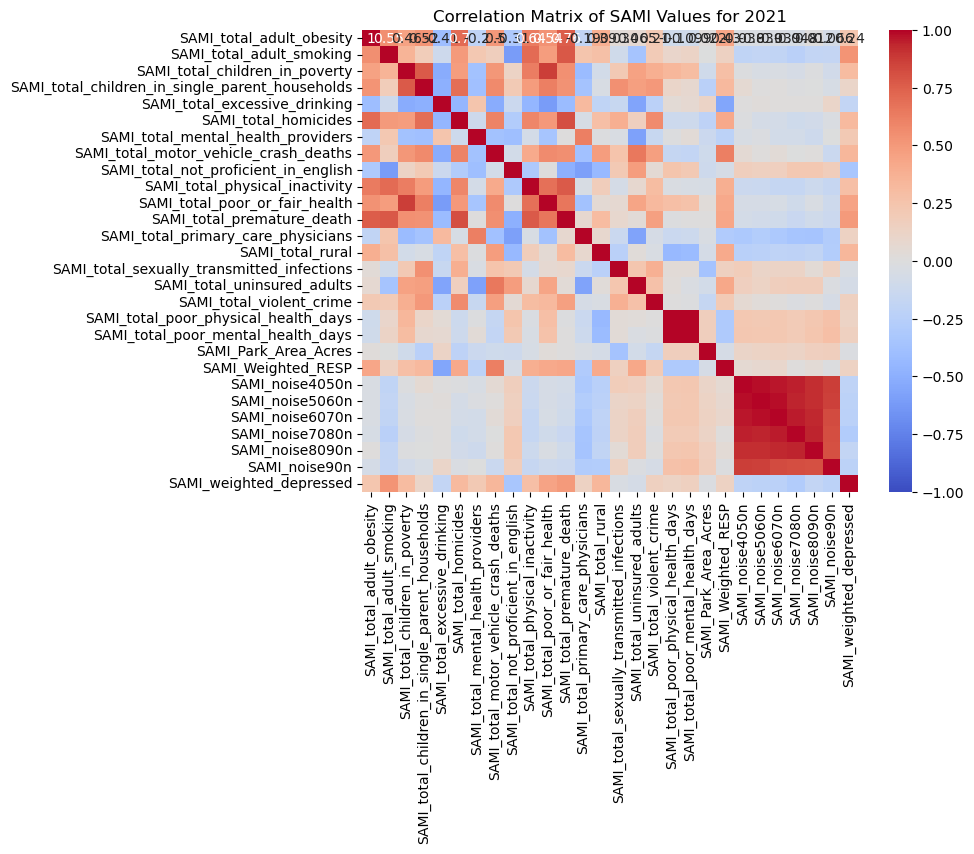

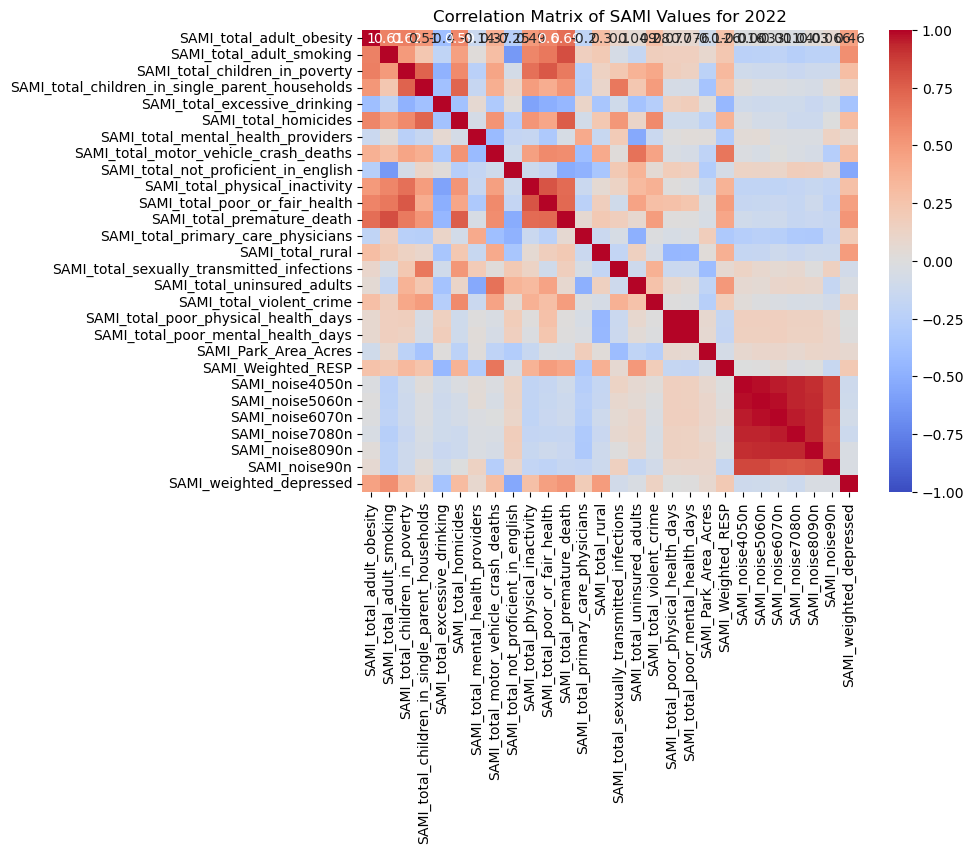

In [14]:
def calculate_sami(df, target_column, year):
    df['log_' + target_column] = np.log(df[target_column].replace(0, np.nan))
    df['logpop'] = np.log(df['population'].replace(0, np.nan))
    year_data = df[df['year'] == year].dropna(subset=['log_' + target_column, 'logpop'])
    if year_data.empty:
        return None
    lm = smf.ols(formula=f'log_{target_column} ~ logpop', data=year_data).fit()
    intercept = lm.params['Intercept']
    year_data[f'SAMI_{target_column}'] = year_data['log_' + target_column] - (lm.params['logpop'] * year_data['logpop'] + intercept)
    return year_data[f'SAMI_{target_column}']

sami_dict_by_year = {}

for year in sorted(df['year'].unique()):
    year_sami_data = pd.DataFrame()
    for factor_col in target_cols:
        sami_values = calculate_sami(df, factor_col, year)
        year_sami_data[f'SAMI_{factor_col}'] = sami_values
    sami_dict_by_year[year] = year_sami_data

for year, sami_data in sami_dict_by_year.items():
    sami_data = sami_data.dropna()
    if not sami_data.empty:
        corr_matrix = sami_data.corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
        plt.title(f"Correlation Matrix of SAMI Values for {year}")
        plt.show()
    else:
        print(f"No valid SAMI data for year {year}, skipping visualization.")